In [383]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [384]:
df = pd.read_csv("SeoulBikeData.csv", encoding="unicode_escape")

In [385]:
df.shape

(8760, 14)

In [386]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [388]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [389]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,30/11/2018,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [390]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [391]:
df['Week'] = df['Date'].dt.day_name()
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.drop('Date',axis=1,inplace=True)

In [392]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Week,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Week                       8760 non-null   objec

## EDA

KeyboardInterrupt: 

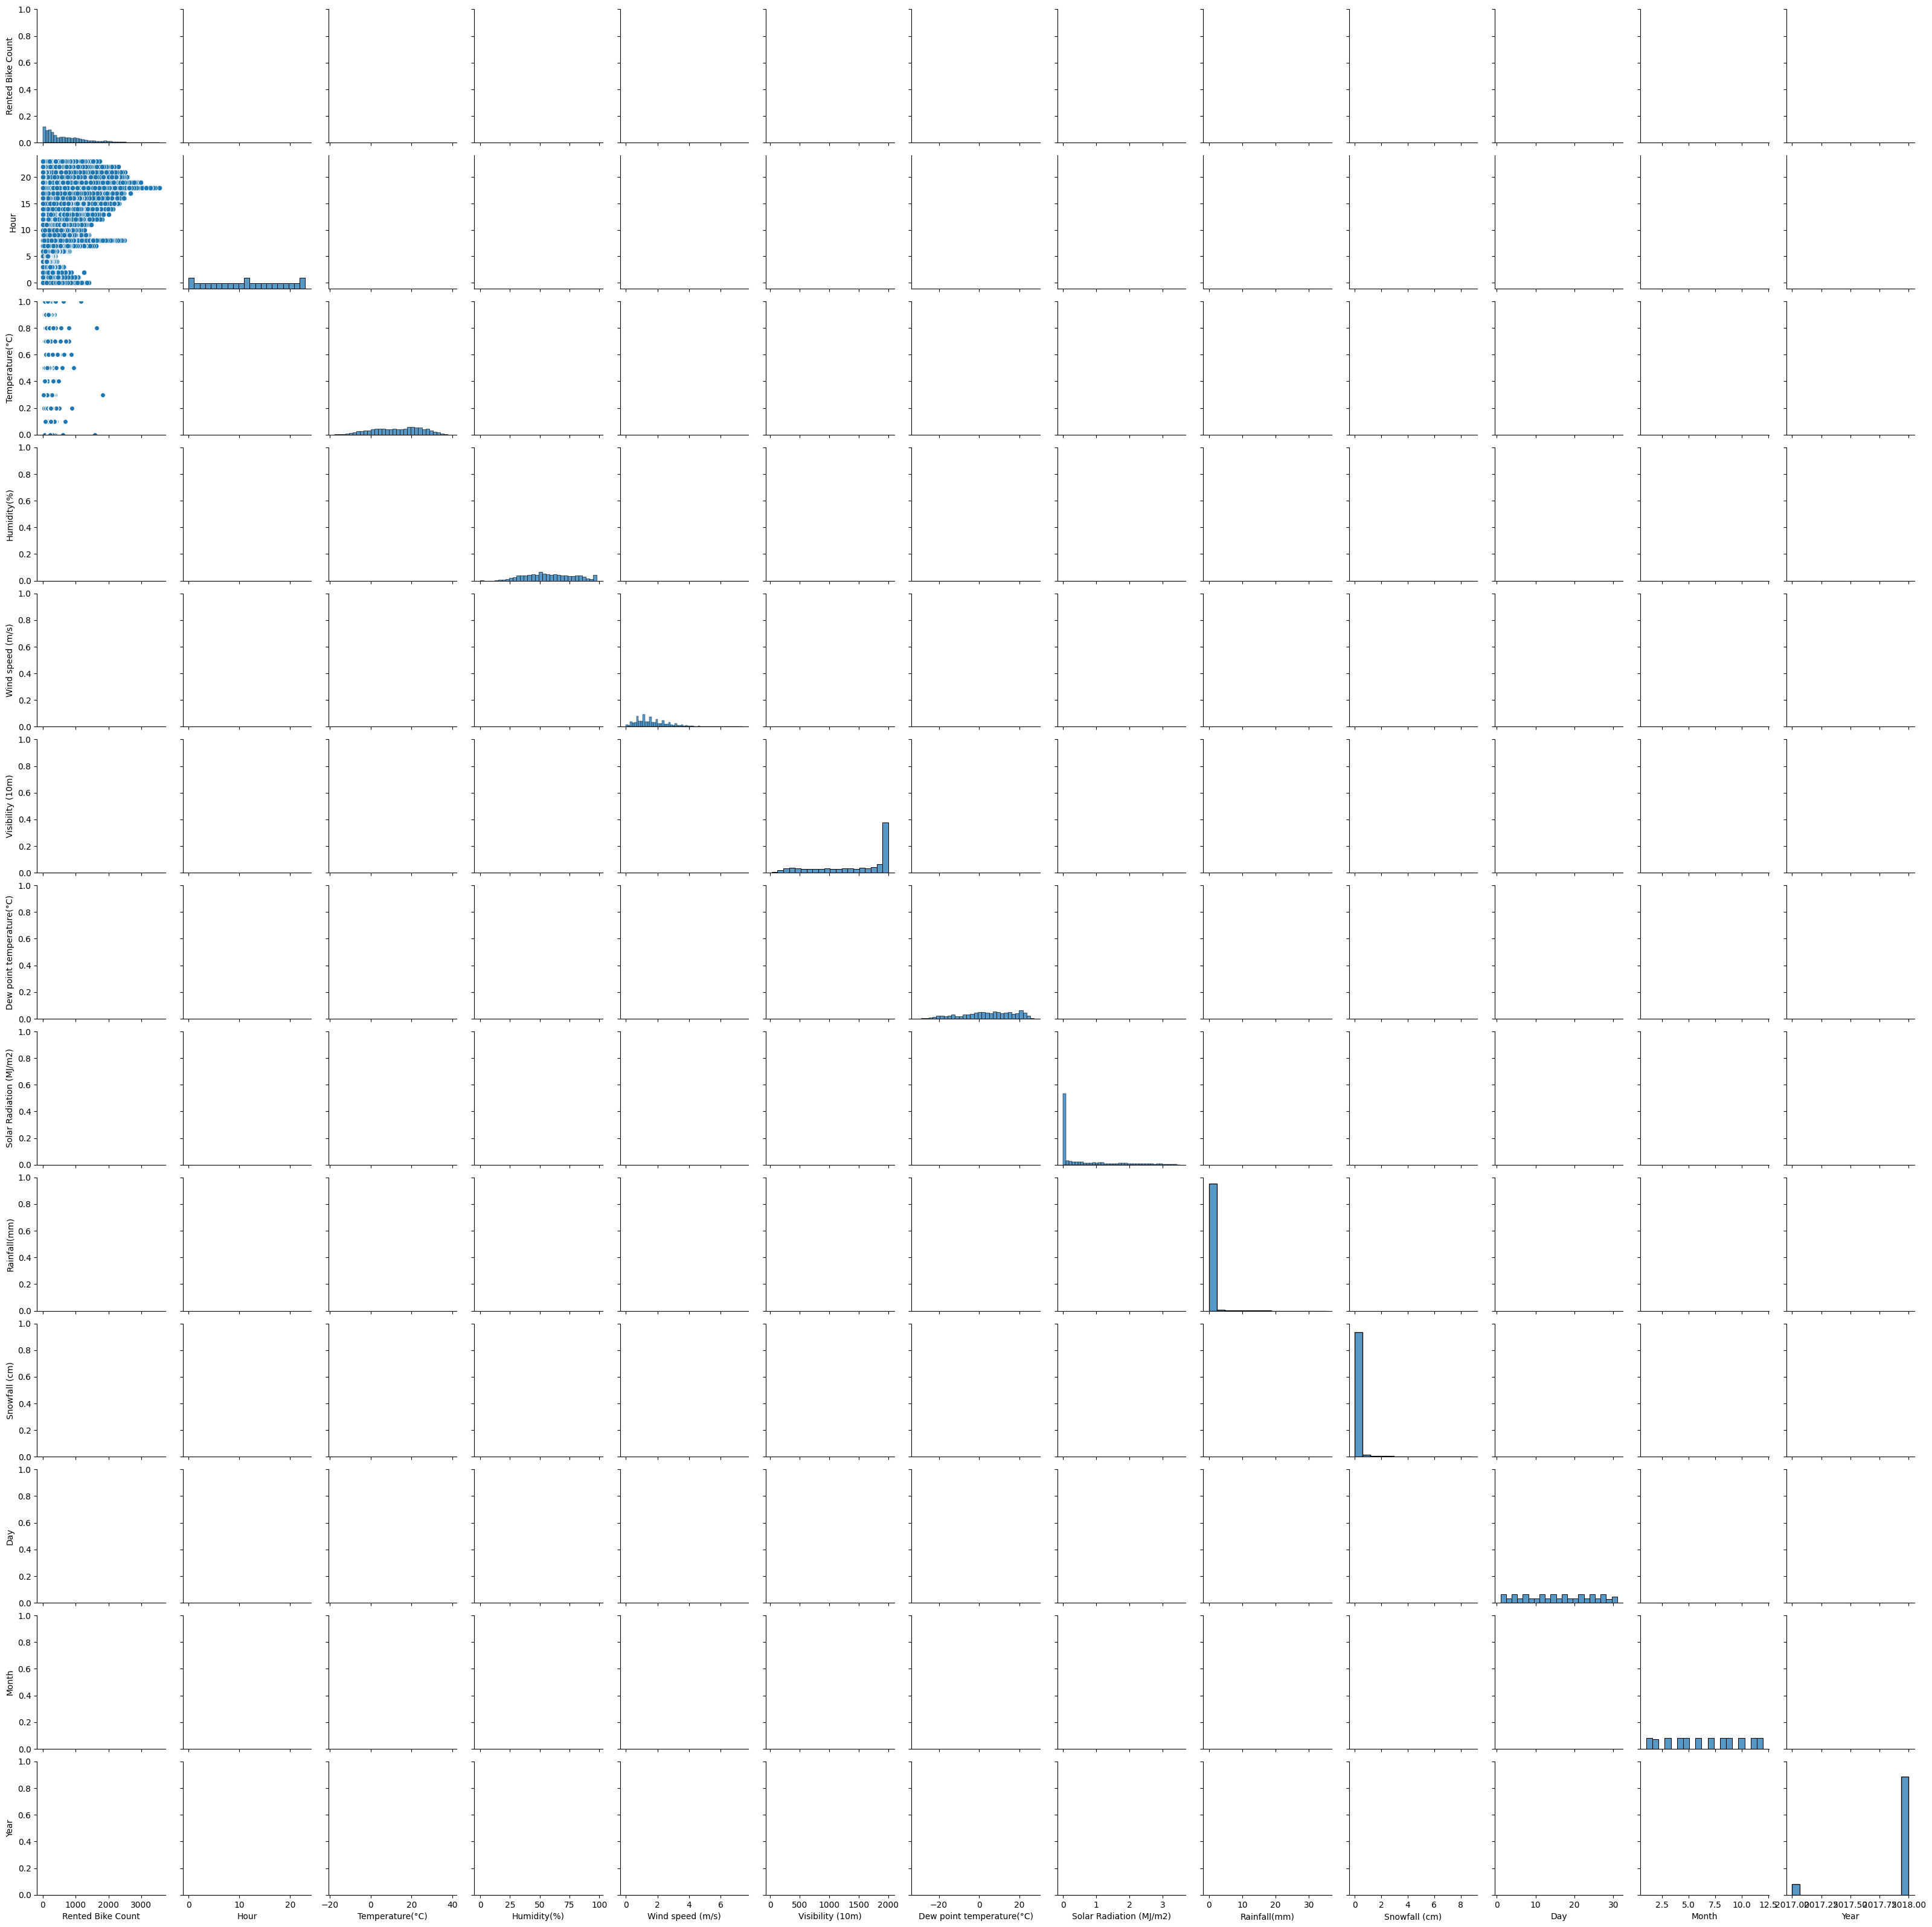

In [394]:
sns.pairplot(df)

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

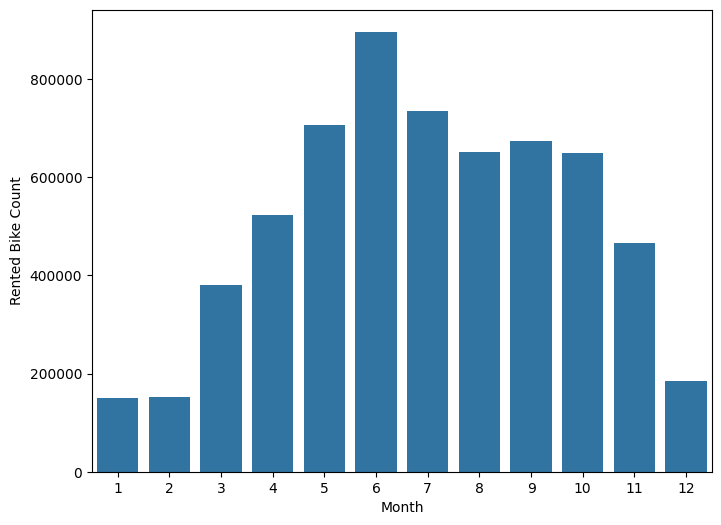

In [ ]:
plt.figure(figsize=(8,6))
Month = df.groupby("Month").sum().reset_index()

sns.barplot(x="Month",y="Rented Bike Count",data=Month)

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

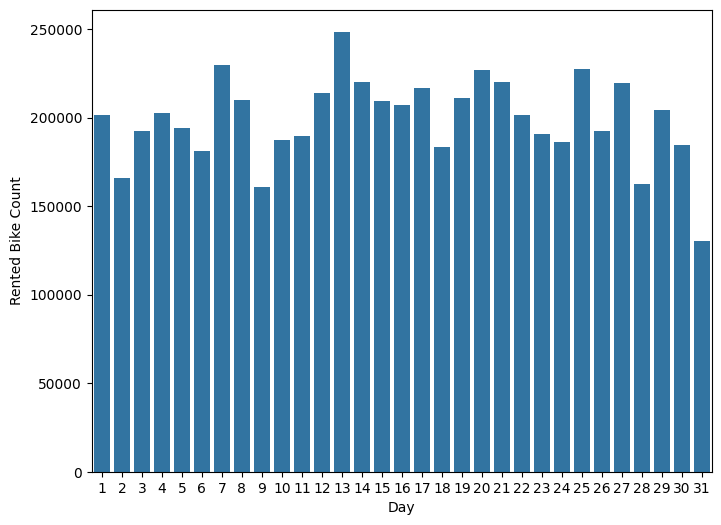

In [ ]:
plt.figure(figsize=(8,6))
Day = df.groupby("Day").sum().reset_index()

sns.barplot(x="Day",y="Rented Bike Count",data=Day)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

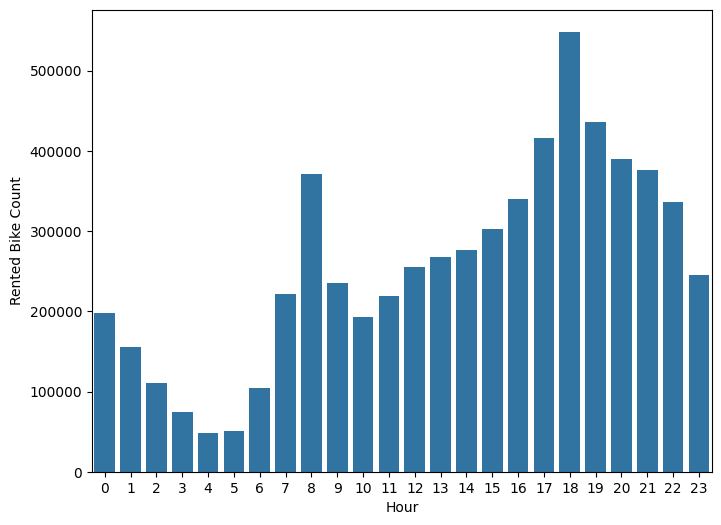

In [ ]:
plt.figure(figsize=(8,6))
Hour = df.groupby("Hour").sum().reset_index()

sns.barplot(x="Hour",y="Rented Bike Count",data=Hour)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

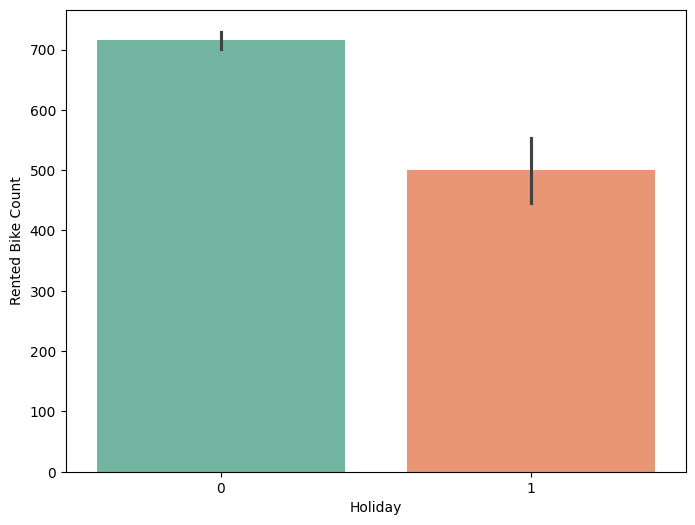

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(x="Holiday",y="Rented Bike Count",data=df, palette="Set2")

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

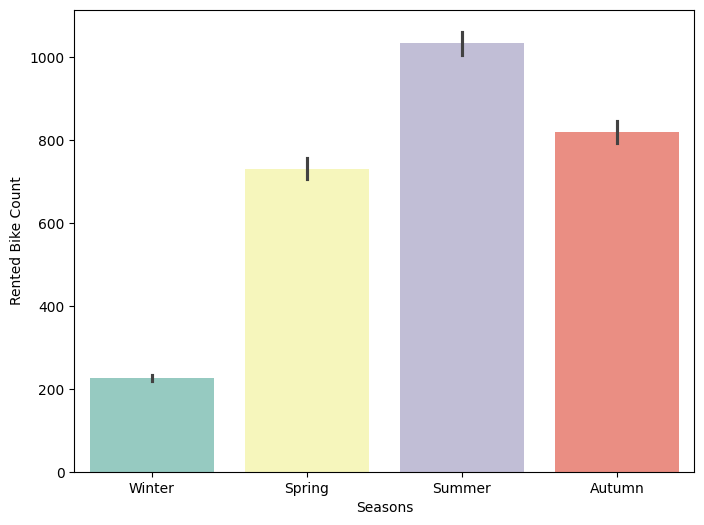

In [396]:
plt.figure(figsize=(8,6))

sns.barplot(x="Seasons",y="Rented Bike Count",data=df, palette='Set3')

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

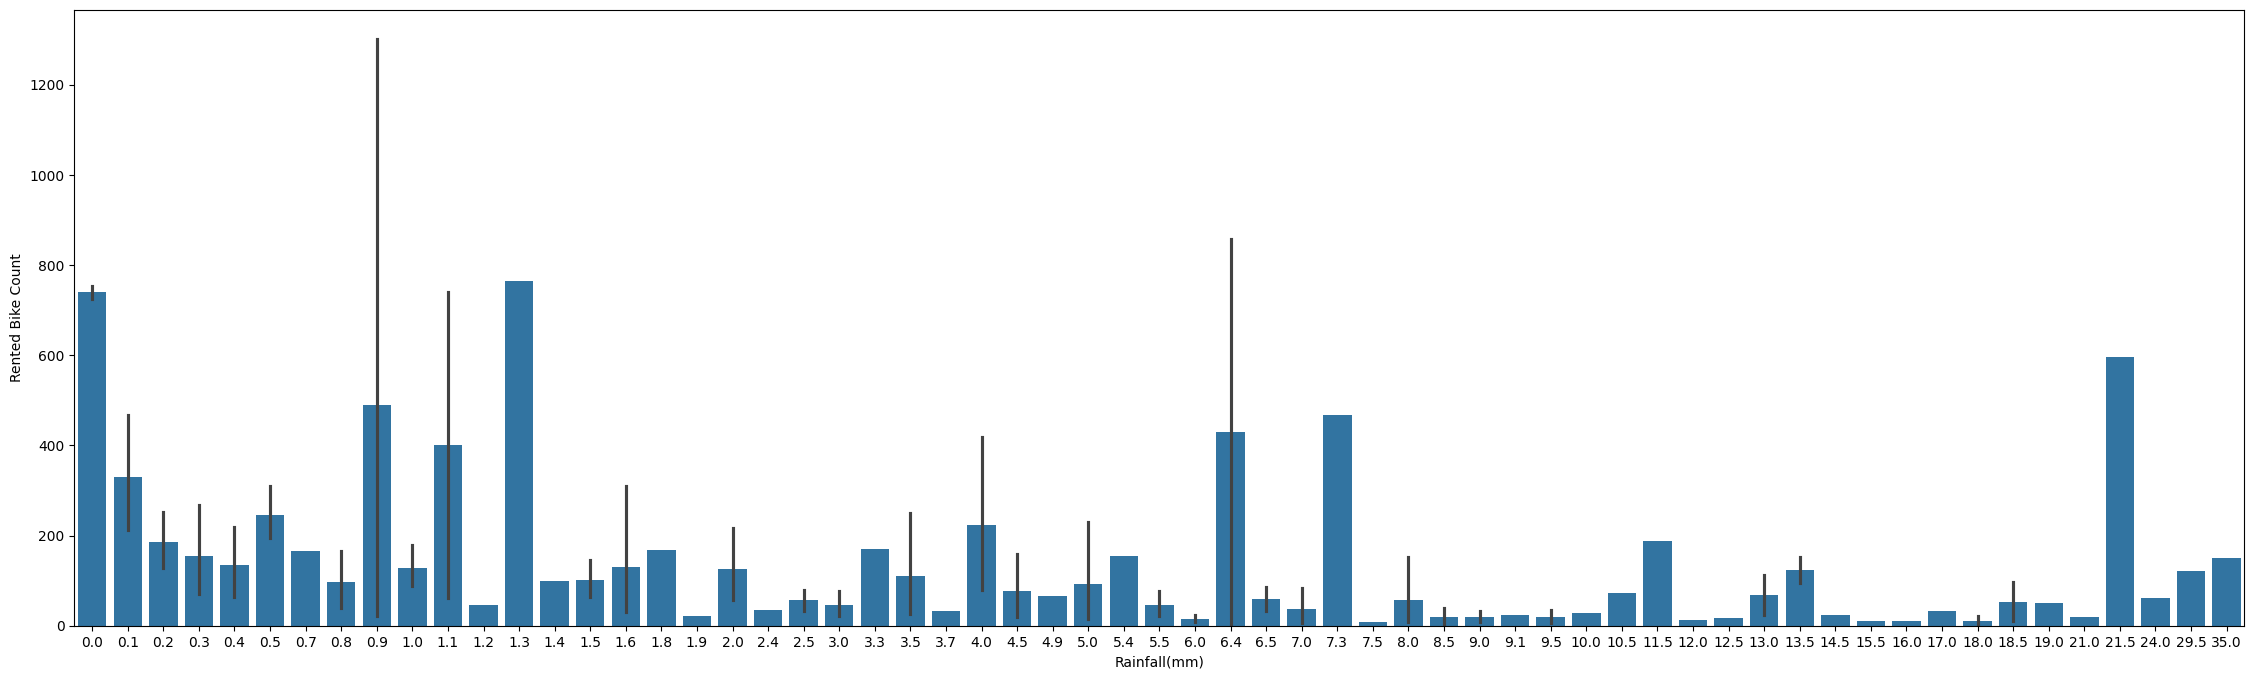

In [397]:
plt.figure(figsize=(28,8))

sns.barplot(x="Rainfall(mm)",y="Rented Bike Count",data=df)

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

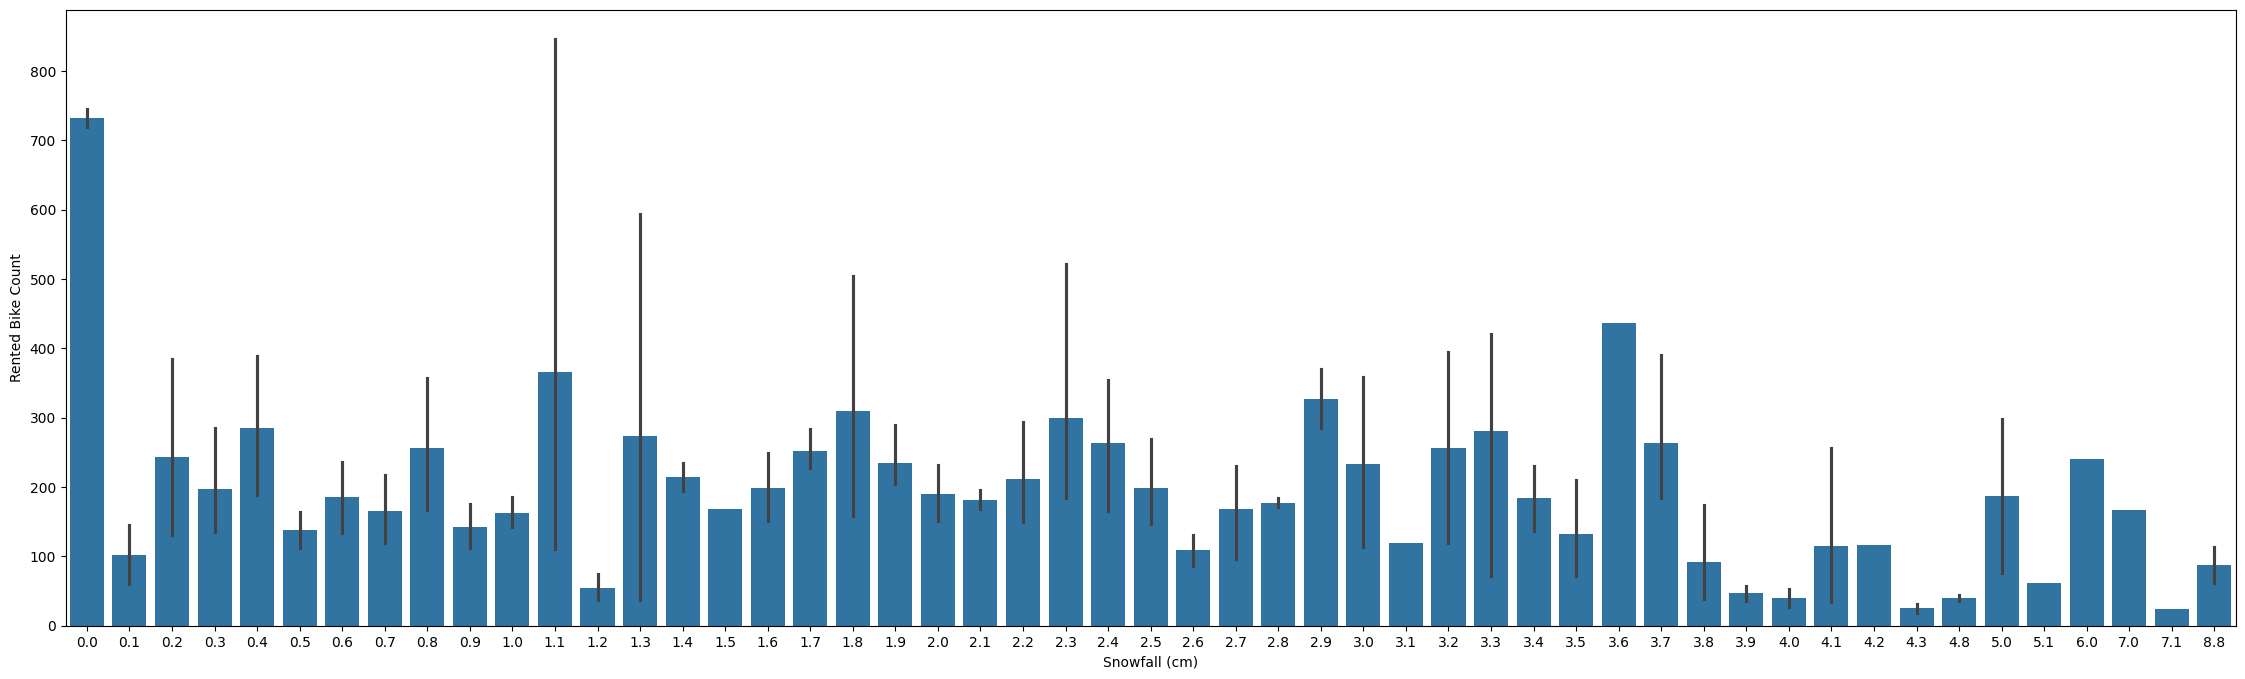

In [398]:
plt.figure(figsize=(28,8))

sns.barplot(x="Snowfall (cm)",y="Rented Bike Count",data=df)

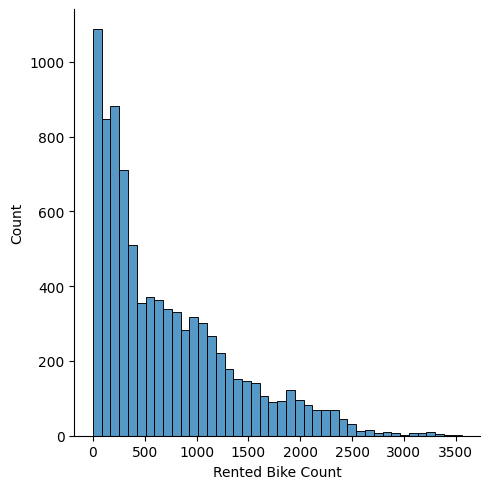

In [409]:
sns.displot(df['Rented Bike Count'])

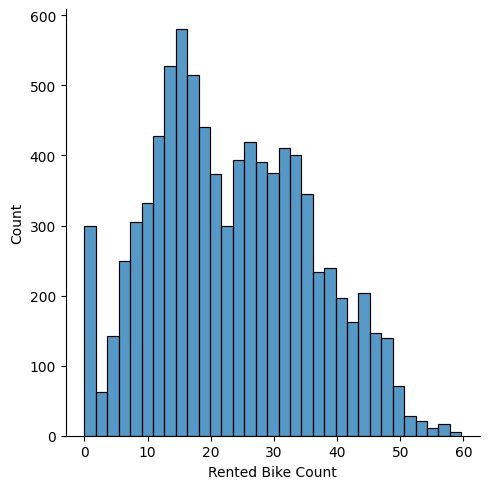

In [410]:
sns.displot(np.sqrt(df['Rented Bike Count']))

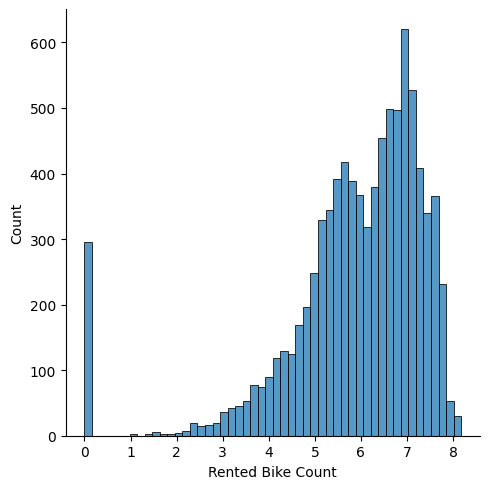

In [411]:
sns.displot(np.log1p(df['Rented Bike Count']))

### skew

In [412]:
df[['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)',
   'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Day','Month','Year']].skew().sort_values(ascending=True)

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

<Axes: >

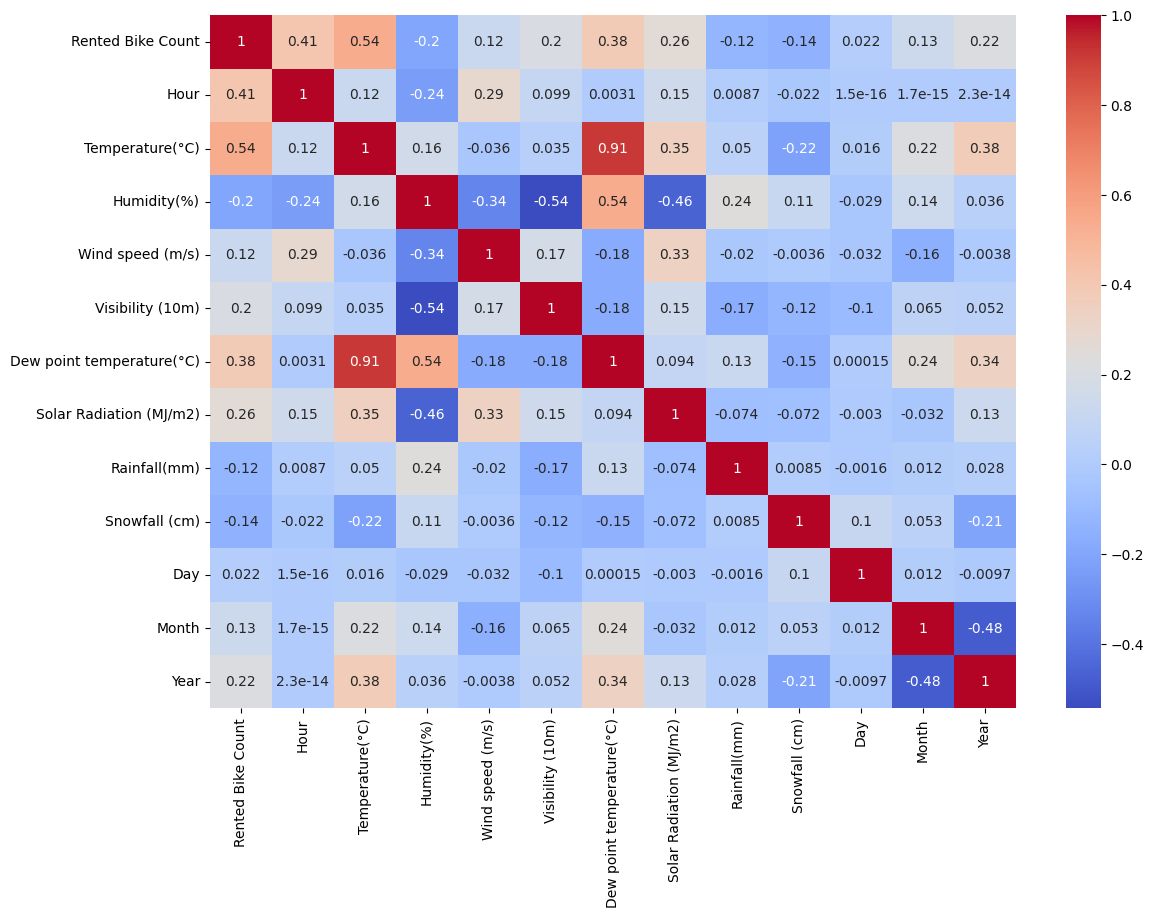

In [413]:
plt.figure(figsize=(13,9))
sns.heatmap(df[['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)',
   'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Day','Month','Year']].corr(),annot=True,cmap='coolwarm')

In [414]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [415]:
def get_vif(df):
    numeric_df = df.select_dtypes(include=['number'])
    
    vif = pd.DataFrame()
    vif['variables'] = numeric_df.columns
    vif['VIF'] = [variance_inflation_factor(numeric_df.values, i) 
                  for i in range(numeric_df.shape[1])]
    return vif

In [416]:
not_in_vif = ["Day","Month","Year","Dew point temperature(°C)", "Rented Bike Count"]

selected_columns = [i for i in df.columns if i not in not_in_vif]
get_vif(df[selected_columns])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [417]:
not_in_vif = ["Day","Month","Year", "Rented Bike Count"]

selected_columns = [i for i in df.columns if i not in not_in_vif]
get_vif(df[selected_columns])

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


In [418]:
df[[i for i in df.columns if i not in not_in_vif]]

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Week
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday


In [419]:
df.drop(["Dew point temperature(°C)"], axis=1, inplace=True)

## Encoding

#

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Week                     8760 non-null   object 
 13  Day                      8760 non-null   int32  
 14  Month                   

In [421]:
cat_features = ["Seasons","Holiday","Functioning Day","Week"]

In [422]:
df["Holiday"].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [423]:
df["Functioning Day"].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [424]:
df["Seasons"].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [425]:
df["Week"].value_counts()

Week
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64

In [426]:
df["Holiday"] = df["Holiday"].map({"No Holiday":0,"Holiday":1})
df["Functioning Day"] = df["Functioning Day"].map({"No":0,"Yes":1})

#### one hot encode

In [427]:
df_seasons = pd.get_dummies(df["Seasons"],drop_first=False,dtype=np.uint8)

df_week = pd.get_dummies(df["Week"],drop_first=False,dtype=np.uint8)

In [428]:
df = pd.concat([df,df_seasons,df_week],axis=1,)

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Week                     8760 non-null   object 
 13  Day                      8760 non-null   int32  
 14  Month                   

In [430]:
df.drop(["Seasons","Week"],axis=1,inplace=True)

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int32  
 12  Month                    8760 non-null   int32  
 13  Year                     8760 non-null   int32  
 14  Autumn                  

In [432]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Spring,Summer,Winter,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0


In [433]:
df.shape

(8760, 25)

In [434]:
X = df.drop("Rented Bike Count",axis=1)
y = df["Rented Bike Count"]

In [435]:
from sklearn.model_selection import train_test_split

In [436]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [437]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 24), (1752, 24), (7008,), (1752,))

In [438]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [440]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def get_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    n = X_test.shape[0]
    p = X_test.shape[1] 
    adj_r2 = 1 - (1-r2) * (n-1)/(n-p-1)

    print(f'{model_name} : [MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}, Adjusted R2 : {adj_r2}]')


## Train multiple models

In [445]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [446]:
import warnings
warnings.filterwarnings("ignore")

### Using Log transformaton

In [447]:
y_train_log = np.log1p(y_train)

In [500]:
lr = LinearRegression().fit(X_train,y_train_log)
y_pred_lr = lr.predict(X_test)

rir = Ridge().fit(X_train, y_train_log)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train, y_train_log)
y_pred_lar = lar.predict(X_test)

svr = SVR().fit(X_train, y_train_log)
y_pred_svr = svr.predict(X_test)

knnr = KNeighborsRegressor().fit(X_train, y_train_log)
y_pred_knnr = knnr.predict(X_test)

dtr = DecisionTreeRegressor().fit(X_train, y_train_log)
y_pred_dtr = dtr.predict(X_test)

rfr = RandomForestRegressor().fit(X_train, y_train_log)
y_pred_rfr = rfr.predict(X_test)

xgbr = XGBRegressor().fit(X_train, y_train_log)
y_pred_xgbr = xgbr.predict(X_test)

In [501]:
get_metrics(y_test, np.expm1(y_pred_lr), "Linear Regression")
get_metrics(y_test, np.expm1(y_pred_rir), "\nRidge")
get_metrics(y_test, np.expm1(y_pred_lar), "\nLasso")
get_metrics(y_test, np.expm1(y_pred_svr), "\nSVR")
get_metrics(y_test, np.expm1(y_pred_knnr), "\nKNNR")
get_metrics(y_test, np.expm1(y_pred_dtr), "\nDecision Tree Regressor")
get_metrics(y_test, np.expm1(y_pred_rfr), "\nRandom Forest Regressor")
get_metrics(y_test, np.expm1(y_pred_xgbr), "\nXGB Regressor")

Linear Regression : [MSE: 186905.8294, MAE: 278.1352, RMSE: 432.3261, R2: 0.5397, Adjusted R2 : 0.5333107228945297]

Ridge : [MSE: 186926.1099, MAE: 278.1313, RMSE: 432.3495, R2: 0.5397, Adjusted R2 : 0.5332600839243462]

Lasso : [MSE: 495477.7209, MAE: 490.7688, RMSE: 703.9018, R2: -0.2202, Adjusted R2 : -0.23716922112019656]

SVR : [MSE: 94103.8886, MAE: 184.1337, RMSE: 306.7636, R2: 0.7683, Adjusted R2 : 0.7650299303482269]

KNNR : [MSE: 105552.3713, MAE: 202.5253, RMSE: 324.8882, R2: 0.7401, Adjusted R2 : 0.736443962075723]

Decision Tree Regressor : [MSE: 52177.3579, MAE: 123.7266, RMSE: 228.4236, R2: 0.8715, Adjusted R2 : 0.8697172072803429]

Random Forest Regressor : [MSE: 32894.6799, MAE: 94.9890, RMSE: 181.3689, R2: 0.9190, Adjusted R2 : 0.9178645501112099]

XGB Regressor : [MSE: 25626.7207, MAE: 85.7031, RMSE: 160.0835, R2: 0.9369, Adjusted R2 : 0.9360120643337959]


### Visualize prediction of log transformation

In [502]:
def get_plot(y_test,y_pred,model_name):
    
    plt.scatter(y_test,y_pred)
    plt.xlabel("Ground Truth")
    plt.ylabel("Prediction")    
    plt.title(f"{model_name} vs Prediction")


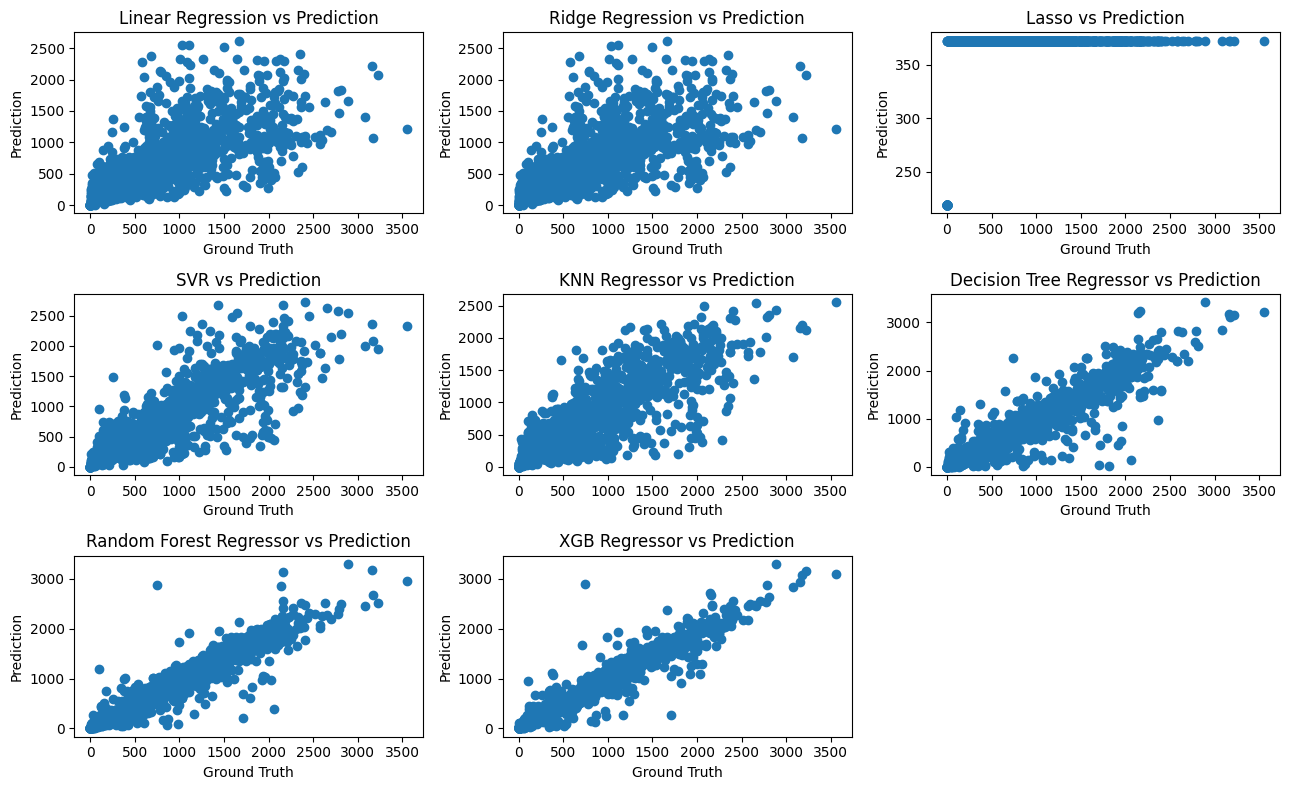

In [503]:
predictions = {
    "Linear Regression": np.expm1(y_pred_lr),
    "Ridge Regression": np.expm1(y_pred_rir),
    "Lasso": np.expm1(y_pred_lar),
    "SVR": np.expm1(y_pred_svr),
    "KNN Regressor": np.expm1(y_pred_knnr),
    "Decision Tree Regressor": np.expm1(y_pred_dtr),
    "Random Forest Regressor": np.expm1(y_pred_rfr),
    "XGB Regressor": np.expm1(y_pred_xgbr)
}

n_models = len(predictions)
plt.figure(figsize=(13, 8))

for i, (name, pred) in enumerate(predictions.items(), 1):
    plt.subplot(3, 3, i)
    get_plot(y_test, pred, name)

plt.tight_layout()
plt.show()


### Hyperparameter tuning for Random Forest for log transformation

In [ ]:
import time
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators': [100, 500,1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [20,50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

start_time = time.time()

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=100,
    cv=5,
    verbose=1,
    random_state=10,
    n_jobs=-1
)

rf_random.fit(X_train, y_train_log)

y_pred_rf_random = rf_random.predict(X_test)

print("Time taken to train using RandomizedSearchCV: ", round(time.time() - start_time), "seconds")


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Time taken to train using RandomizedSearchCV:  94 seconds


In [ ]:
print("Best Parameters from RandomizedSearchCV:", rf_random.best_params_)
print(get_metrics(y_test, np.expm1(y_pred_rf_random), "\nRandomForest (Tuned)"))

Best Parameters from RandomizedSearchCV: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
RandomForest (Tuned) : [MSE: 45576.0048, MAE: 120.3548, RMSE: 213.4854, R2: 0.8878, Adjusted R2 : 0.8862002709723542]
None


### Hyperparameter tuning XGB for log tranformation

In [ ]:
start_time = time.time()

params = {
    'max_depth': [3, 5, 6, 10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'n_estimators': [100, 500, 1000]
}

# Base model
xgbr = XGBRegressor(seed=20)

rscv = RandomizedSearchCV(
    estimator=xgbr,
    param_distributions=params,
    scoring='neg_mean_squared_error',
    n_iter=100,
    cv=5,
    verbose=1,
    random_state=10,
    n_jobs=-1
)

rscv.fit(X_train, y_train_log)

y_pred_xgb_random = rscv.predict(X_test)

print("Time taken using RandomizedSearchCV: ", round(time.time() - start_time, 2), "seconds")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Time taken using RandomizedSearchCV:  52.31 seconds


In [ ]:
print("Best parameters:", rscv.best_params_)
print(get_metrics(y_test, np.expm1(y_pred_xgb_random), "\nXGBRegressor With Best Parameters"))

Best parameters: {'subsample': np.float64(0.8999999999999999), 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': np.float64(0.7), 'colsample_bylevel': np.float64(0.4)}
XGBRegressor With Best Parameters : [MSE: 23495.4336, MAE: 83.5011, RMSE: 153.2822, R2: 0.9421, Adjusted R2 : 0.9413337309234875]
None


### Better version of XGB Regressor for log transformation

In [488]:
xgb = XGBRegressor(
    max_depth = 6,
    learning_rate =0.1,
    subsample =0.8,
    colsample_bytree = 0.9,
    colsample_bylevel = 0.9,
    n_estimators =1000
)

xgb.fit(X_train, y_train_log)

y_pred_xgb_tuned = xgb.predict(X_test)

get_metrics(y_test, np.expm1(y_pred_xgb_tuned), "XGBRegressor With Tuning")

XGBRegressor With Tuning : [MSE: 19817.2148, MAE: 72.6511, RMSE: 140.7736, R2: 0.9512, Adjusted R2 : 0.9505179705617051]


### Using Sqrt

In [493]:
y_train_sqrt = np.sqrt(y_train)

In [504]:
lr = LinearRegression().fit(X_train, y_train_sqrt)
y_pred_lr = lr.predict(X_test)

rir = Ridge().fit(X_train, y_train_sqrt)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train, y_train_sqrt)
y_pred_lar = lar.predict(X_test)

svr = SVR().fit(X_train, y_train_sqrt)
y_pred_svr = svr.predict(X_test)

knnr = KNeighborsRegressor().fit(X_train, y_train_sqrt)
y_pred_knnr = knnr.predict(X_test)

dtr = DecisionTreeRegressor().fit(X_train, y_train_sqrt)
y_pred_dtr = dtr.predict(X_test)

rfr = RandomForestRegressor().fit(X_train, y_train_sqrt)
y_pred_rfr = rfr.predict(X_test)

xgbr = XGBRegressor().fit(X_train, y_train_sqrt)
y_pred_xgbr = xgbr.predict(X_test)


In [505]:
get_metrics(y_test, np.square(y_pred_lr), "Linear Regression")
get_metrics(y_test, np.square(y_pred_rir), "\nRidge")
get_metrics(y_test, np.square(y_pred_lar), "\nLasso")
get_metrics(y_test, np.square(y_pred_svr), "\nSVR")
get_metrics(y_test, np.square(y_pred_knnr), "\nKNNR")
get_metrics(y_test, np.square(y_pred_dtr), "\nDecision Tree Regressor")
get_metrics(y_test, np.square(y_pred_rfr), "\nRandom Forest Regressor")
get_metrics(y_test, np.square(y_pred_xgbr), "\nXGB Regressor")

Linear Regression : [MSE: 159268.0407, MAE: 271.1723, RMSE: 399.0840, R2: 0.6078, Adjusted R2 : 0.6023201254230068]

Ridge : [MSE: 159285.5650, MAE: 271.1690, RMSE: 399.1060, R2: 0.6077, Adjusted R2 : 0.6022763685864239]

Lasso : [MSE: 192939.6402, MAE: 297.8493, RMSE: 439.2490, R2: 0.5248, Adjusted R2 : 0.5182447679456277]

SVR : [MSE: 112580.7022, MAE: 211.5491, RMSE: 335.5305, R2: 0.7227, Adjusted R2 : 0.7188947680211266]

KNNR : [MSE: 102108.0111, MAE: 203.4873, RMSE: 319.5434, R2: 0.7485, Adjusted R2 : 0.7450442608342123]

Decision Tree Regressor : [MSE: 57400.0776, MAE: 127.4292, RMSE: 239.5831, R2: 0.8586, Adjusted R2 : 0.8566764834460479]

Random Forest Regressor : [MSE: 27776.6353, MAE: 90.2627, RMSE: 166.6632, R2: 0.9316, Adjusted R2 : 0.9306439081630985]

XGB Regressor : [MSE: 20933.5215, MAE: 80.3899, RMSE: 144.6842, R2: 0.9484, Adjusted R2 : 0.9477306208516658]


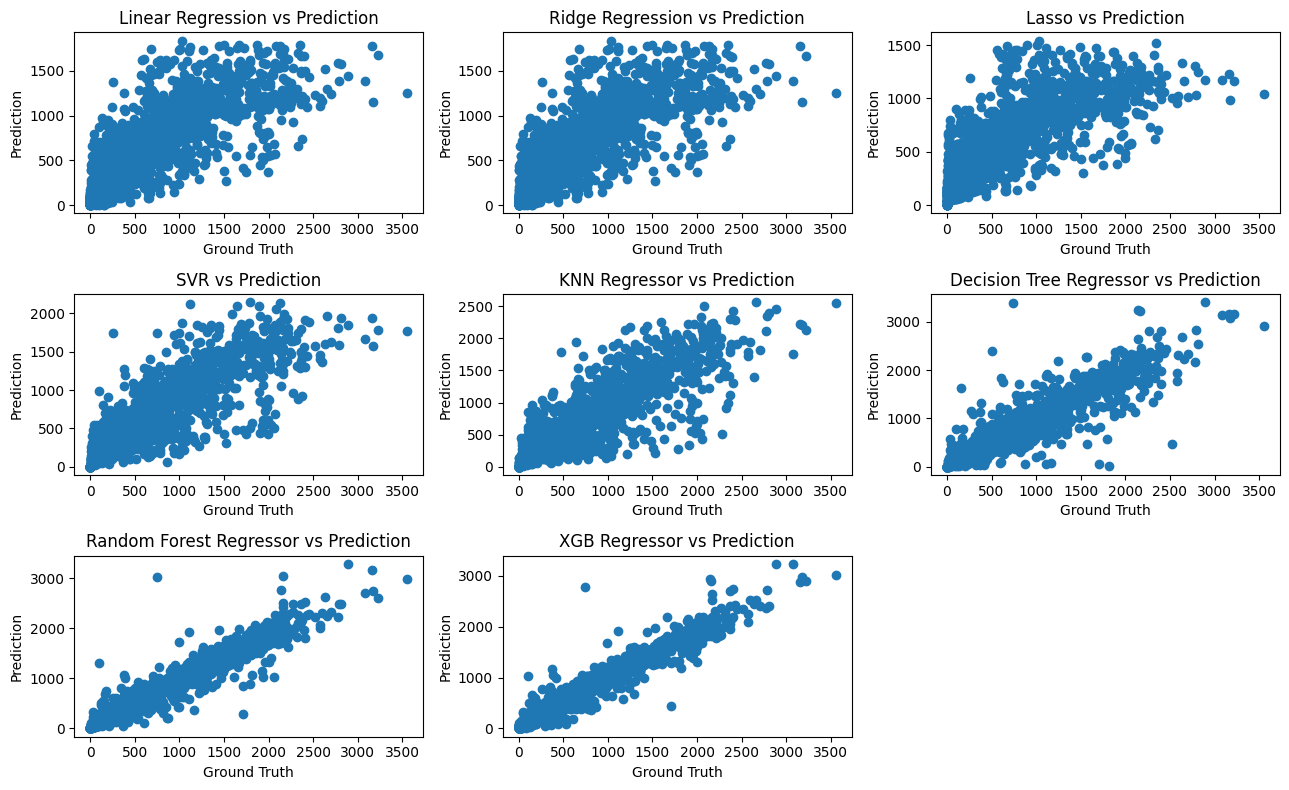

In [506]:
predictions = {
    "Linear Regression": np.square(y_pred_lr),
    "Ridge Regression": np.square(y_pred_rir),
    "Lasso": np.square(y_pred_lar),
    "SVR": np.square(y_pred_svr),
    "KNN Regressor": np.square(y_pred_knnr),
    "Decision Tree Regressor": np.square(y_pred_dtr),
    "Random Forest Regressor": np.square(y_pred_rfr),
    "XGB Regressor": np.square(y_pred_xgbr)
}
n_models = len(predictions)
plt.figure(figsize=(13, 8))

for i, (name, pred) in enumerate(predictions.items(), 1):
    plt.subplot(3, 3, i)
    get_plot(y_test, pred, name)

plt.tight_layout()
plt.show()


### Hyperparameter tuning RF Regressor with sqrt

In [508]:
import time
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators': [500,1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [20,50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

start_time = time.time()

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=100,
    cv=5,
    verbose=1,
    random_state=10,
    n_jobs=-1
)

rf_random.fit(X_train, y_train_sqrt)

y_pred_rf_random = rf_random.predict(X_test)

print("Time taken to train using RandomizedSearchCV: ", round(time.time() - start_time), "seconds")


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Time taken to train using RandomizedSearchCV:  329 seconds


In [ ]:
print("Best Parameters from RandomizedSearchCV:", rf_random.best_params_)
print(get_metrics(y_test, np.square(y_pred_rf_random), "\nRandomForest (Tuned)"))

Best Parameters from RandomizedSearchCV: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
RandomForest (Tuned) : [MSE: 37158.2666, MAE: 112.7096, RMSE: 192.7648, R2: 0.9085, Adjusted R2 : 0.9072187067362388]
None


### Hyperparameter tuning XGB Regressor with sqrt

In [511]:
start_time = time.time()

params = {
    'max_depth': [3, 5, 6, 10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': np.arange(0.7, 1.0, 0.1),
    'colsample_bytree': np.arange(0.6, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.6, 1.0, 0.1),
    'n_estimators': [500, 1000]
}

# Base model
xgbr = XGBRegressor(seed=20)

rscv = RandomizedSearchCV(
    estimator=xgbr,
    param_distributions=params,
    scoring='neg_mean_squared_error',
    n_iter=100,
    cv=5,
    verbose=1,
    random_state=10,
    n_jobs=-1
)

rscv.fit(X_train, y_train_log)

y_pred_xgb_random = rscv.predict(X_test)

print("Time taken using RandomizedSearchCV: ", round(time.time() - start_time, 2), "seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Time taken using RandomizedSearchCV:  480.06 seconds


In [512]:
print("Best parameters:", rscv.best_params_)
print(get_metrics(y_test, np.expm1(y_pred_xgb_random), "\nXGBRegressor With Best Parameters"))

Best parameters: {'subsample': np.float64(0.7), 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': np.float64(0.7999999999999999), 'colsample_bylevel': np.float64(0.7)}

XGBRegressor With Best Parameters : [MSE: 21849.3418, MAE: 78.9271, RMSE: 147.8152, R2: 0.9462, Adjusted R2 : 0.9454438978354228]
None


### Best XGB using sqrt

In [523]:
xgb = XGBRegressor(
    max_depth = 7,
    learning_rate =0.1,
    subsample =0.8,
    colsample_bytree = 0.9,
    colsample_bylevel = 0.9,
    n_estimators =1000
)

xgb.fit(X_train, y_train_sqrt)

y_pred_xgb_tuned = xgb.predict(X_test)

get_metrics(y_test, np.square(y_pred_xgb_tuned), "XGBRegressor With Tuning")

XGBRegressor With Tuning : [MSE: 16487.8418, MAE: 68.0753, RMSE: 128.4050, R2: 0.9594, Adjusted R2 : 0.9588311294219918]


### Save best ML model

In [535]:
import pickle
import os

In [536]:
dir = r"C:\Python\Project\seoul bike\models"

model_file_name = "xgboost_regressor_adj_r2_0.954_v1.pkl"

model_file_path = os.path.join(dir,model_file_name)

pickle.dump(xgb, open(model_file_path,"wb"))

In [537]:
scalar_dump_path = r"C:\Python\Project\seoul bike\models\scalar.pkl"

pickle.dump(scaler, open(scalar_dump_path, "wb"))

In [538]:
y_test.iloc[1]

np.int64(905)

In [539]:
final_predictions = np.square(y_pred_xgb_tuned)

print(f"Prediction in original bike count scale: {int(final_predictions[1])} bikes")

Prediction in original bike count scale: 943 bikes
